## ML-1M
https://grouplens.org/datasets/movielens/

### Load data

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ml_1m_path = "./ml-1m"
# Load data
ratings = pd.read_csv(ml_1m_path+'/ratings.dat', sep='::', engine='python', 
                     names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
movies = pd.read_csv(ml_1m_path+'/movies.dat', sep='::', engine='python', 
                    names=['MovieID', 'Title', 'Genres'], encoding='latin-1')
users = pd.read_csv(ml_1m_path+'/users.dat', sep='::', engine='python', 
                   names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])

data = pd.merge(pd.merge(ratings, users, on='UserID'), movies, on='MovieID')
age_bins = [1, 18, 25, 35, 45, 50, 56]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-49', '50+']
users['AgeGroup'] = pd.cut(users['Age'], bins=age_bins, labels=age_labels)
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)
genre_data = data.copy()
genre_data['Genres'] = genre_data['Genres'].str.split('|')
genre_data = genre_data.explode('Genres') 

C:\Users\Shawn\AppData\Local\Temp\ipykernel_16844\3745364728.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_dist.index, y=age_dist.values, palette='viridis')


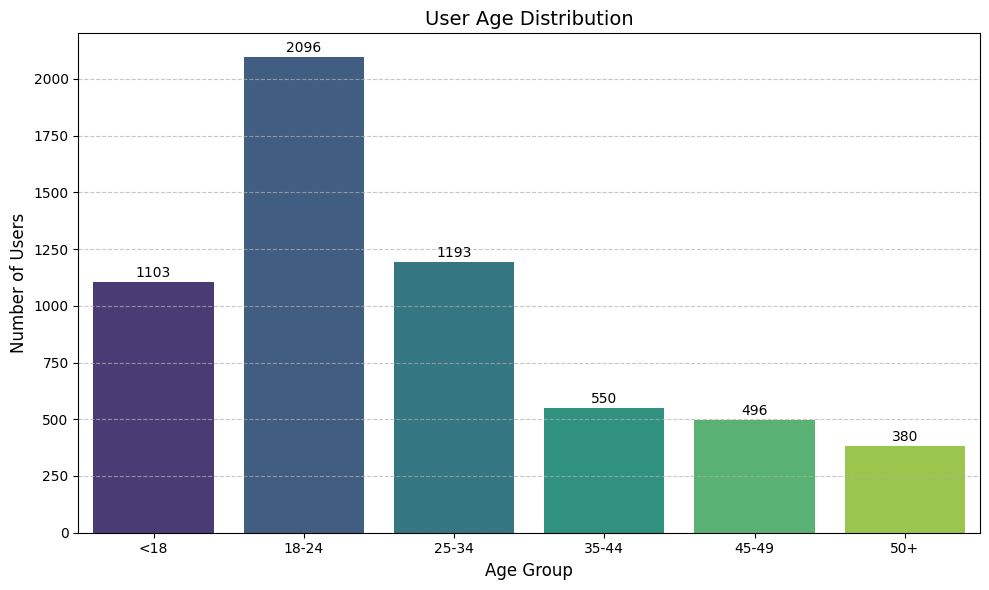

In [ ]:

plt.figure(figsize=(10, 6))
age_dist = users['AgeGroup'].value_counts().sort_index()
sns.barplot(x=age_dist.index, y=age_dist.values, palette='viridis')

plt.title('User Age Distribution', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for i, v in enumerate(age_dist.values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

C:\Users\Shawn\AppData\Local\Temp\ipykernel_8652\1641363335.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rating_counts.index, y=rating_counts.values,


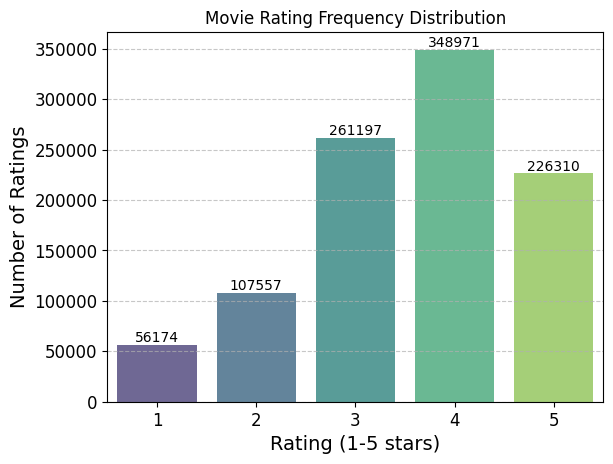

In [ ]:
rating_counts = ratings['Rating'].value_counts().sort_index()
ax = sns.barplot(x=rating_counts.index, y=rating_counts.values, 
                order=[1, 2, 3, 4, 5], alpha=0.8,palette='viridis')

plt.title('Movie Rating Distribution')
plt.xlabel('Rating (1-5 stars)', fontsize=14)
plt.ylabel('Number of Ratings', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels
for i, v in enumerate(rating_counts.values):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=10)

plt.show()

C:\Users\Shawn\AppData\Local\Temp\ipykernel_8652\441725248.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_avg.index, y=genre_avg.values, palette='rocket')


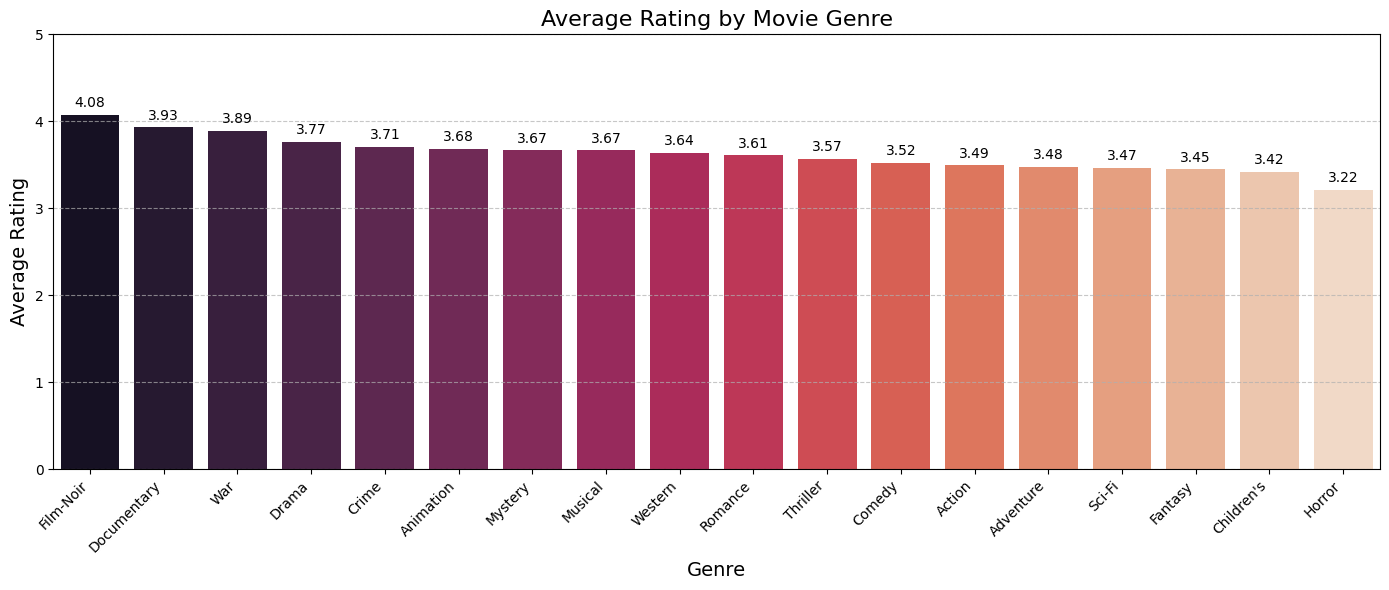

In [ ]:
# Average Rating per Genre (Barplot)
genre_avg = genre_data.groupby('Genres')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(x=genre_avg.index, y=genre_avg.values, palette='rocket')
plt.title('Average Rating by Movie Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 5)  # Match rating scale
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels
for i, v in enumerate(genre_avg.values):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

C:\Users\Shawn\AppData\Local\Temp\ipykernel_8652\2948100123.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=occupation_dist.index, x=occupation_dist.values, palette='rocket')


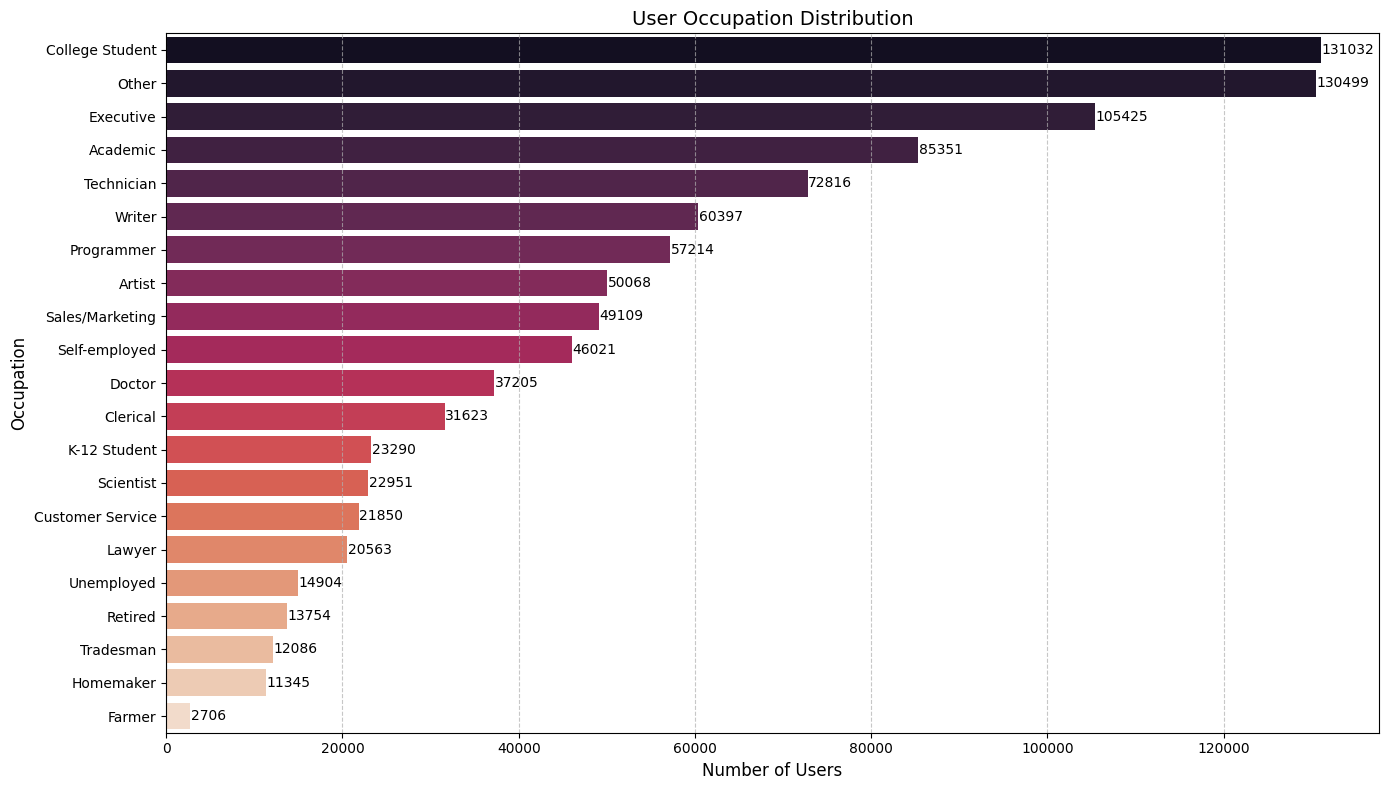

In [ ]:

occupation_mapping = {
    0: "Other",
    1: "Academic",
    2: "Artist",
    3: "Clerical",
    4: "College Student",
    5: "Customer Service",
    6: "Doctor",
    7: "Executive",
    8: "Farmer",
    9: "Homemaker",
    10: "K-12 Student",
    11: "Lawyer",
    12: "Programmer",
    13: "Retired",
    14: "Sales/Marketing",
    15: "Scientist",
    16: "Self-employed",
    17: "Technician",
    18: "Tradesman",
    19: "Unemployed",
    20: "Writer"
}


plt.figure(figsize=(14, 8))
occupation_dist = data['Occupation'].map(occupation_mapping).value_counts()

sns.barplot(y=occupation_dist.index, x=occupation_dist.values, palette='rocket')

plt.title('User Occupation Distribution', fontsize=14)
plt.xlabel('Number of Users', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)


for i, v in enumerate(occupation_dist.values):
    plt.text(v + 50, i, str(v), ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

C:\Users\Shawn\AppData\Local\Temp\ipykernel_8652\4095024892.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_dist.index, x=genre_dist.values, palette='mako')


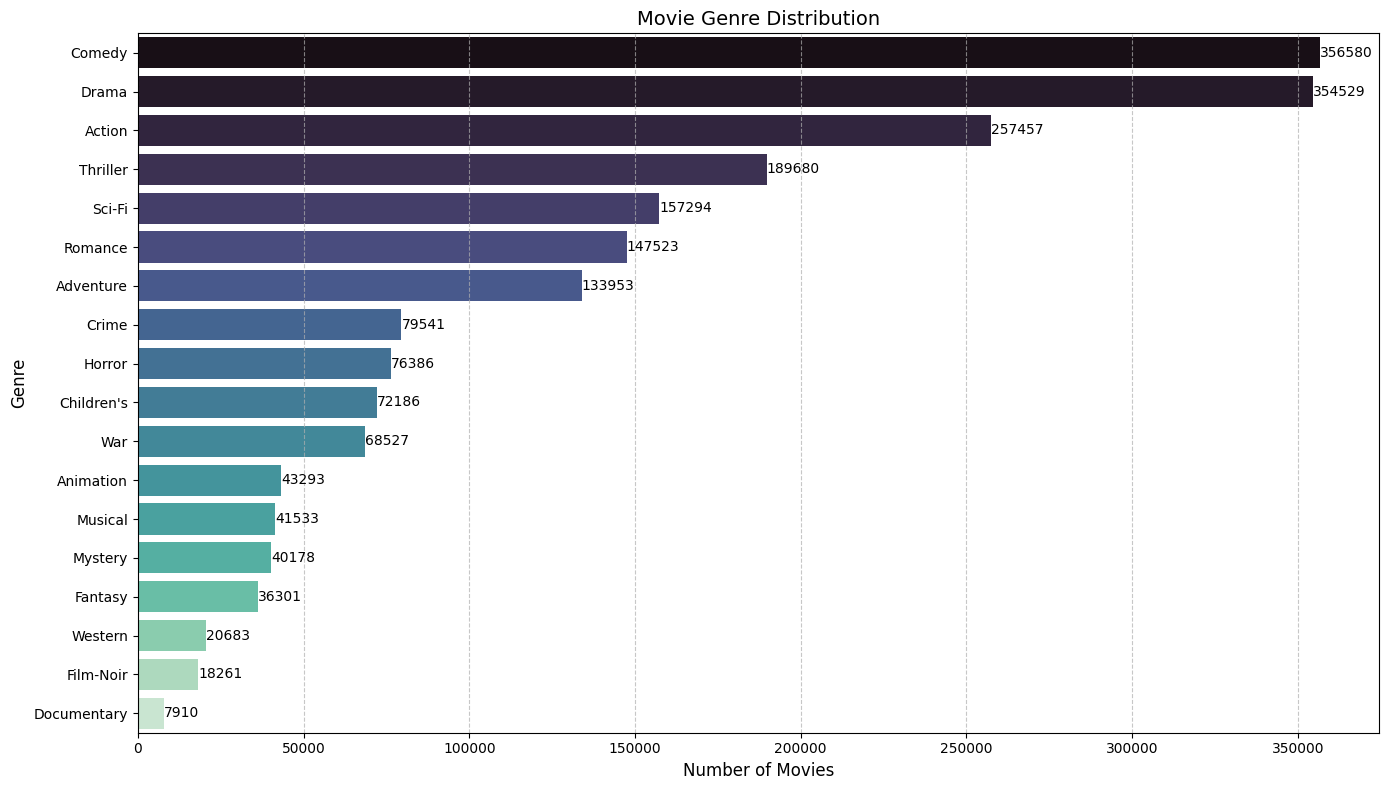

In [ ]:

plt.figure(figsize=(14, 8))
genre_dist = genre_data['Genres'].value_counts()


sns.barplot(y=genre_dist.index, x=genre_dist.values, palette='mako')

plt.title('Movie Genre Distribution', fontsize=14)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)


for i, v in enumerate(genre_dist.values):
    plt.text(v + 10, i, str(v), ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

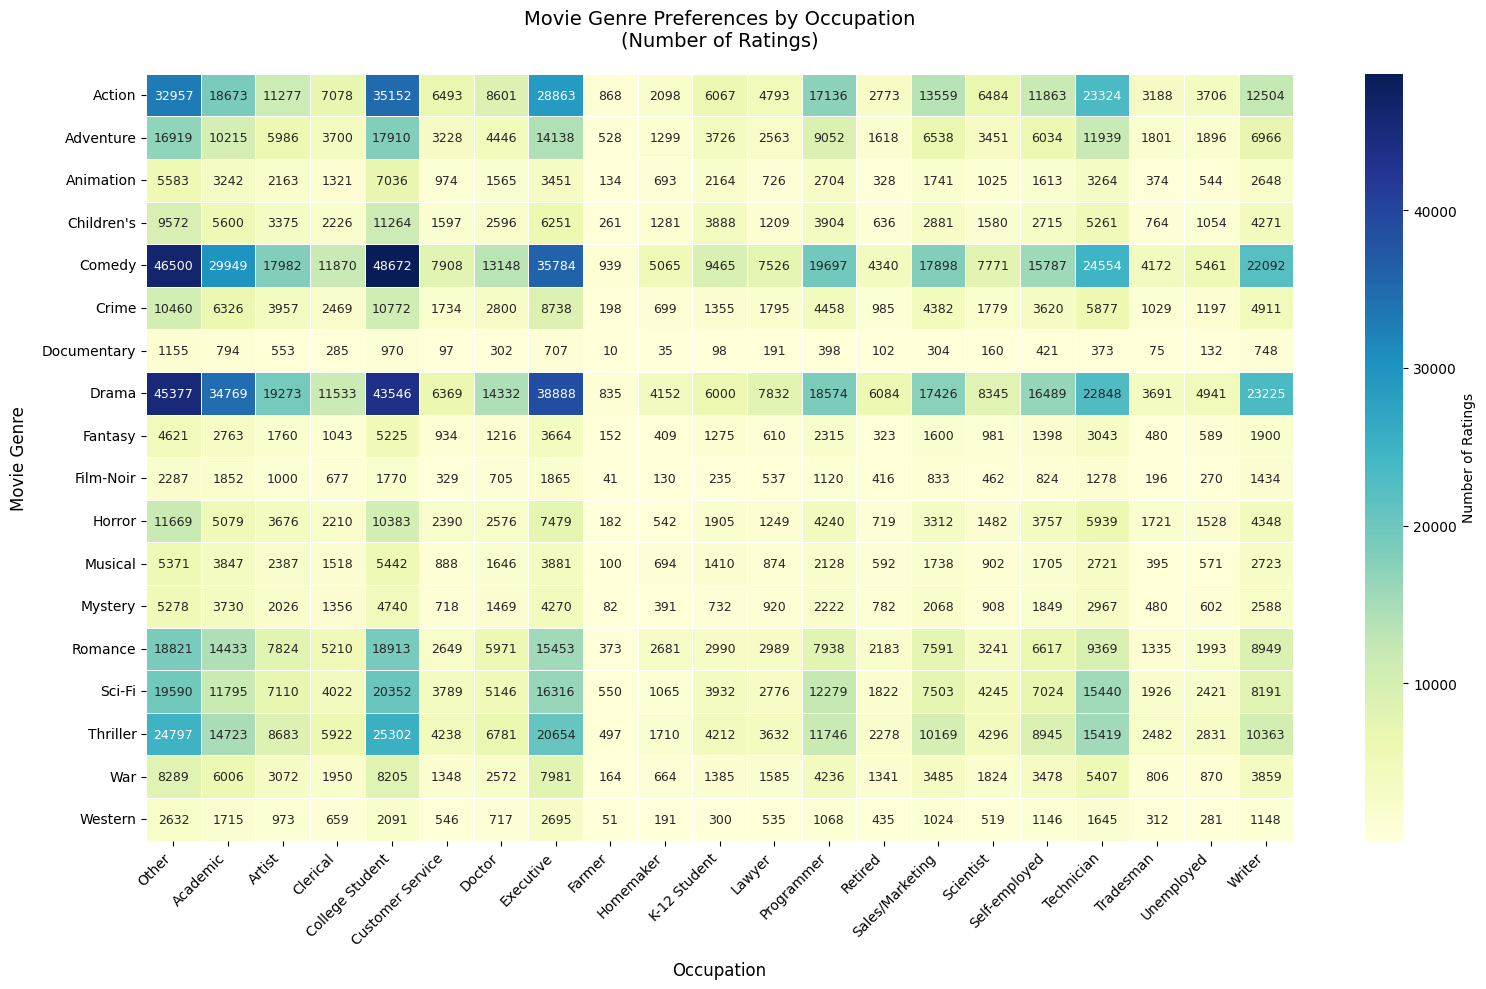

In [ ]:
genre_pref_occ = genre_data.groupby(['Genres', 'Occupation'])['Rating'].count().unstack().fillna(0)
genre_pref_occ.columns = genre_pref_occ.columns.map(occupation_mapping)

plt.figure(figsize=(16, 10))

ax = sns.heatmap(
    genre_pref_occ,
    annot=True,
    fmt='.0f',
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='white',
    annot_kws={'size': 9},
    cbar_kws={'label': 'Number of Ratings'}
)


plt.title('Movie Genre Preferences by Occupation\n(Number of Ratings)', fontsize=14, pad=20)
plt.xlabel('Occupation', fontsize=12, labelpad=10)
plt.ylabel('Movie Genre', fontsize=12, labelpad=10)


ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


ax.grid(False)


plt.tight_layout()

plt.show()


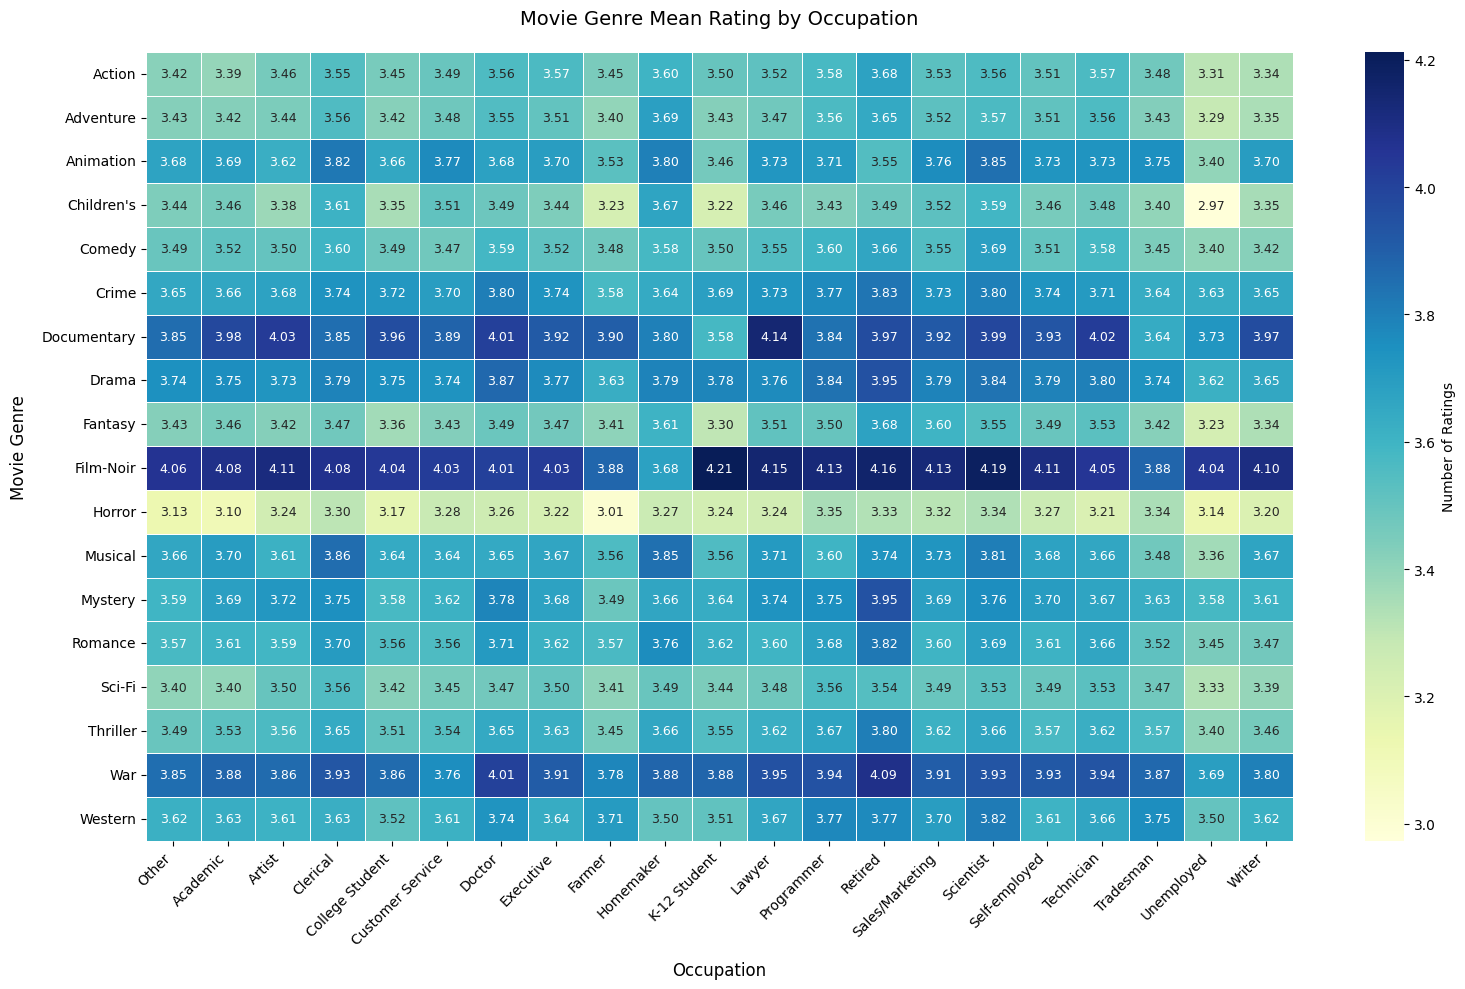

In [ ]:
genre_rating_occ = genre_data.groupby(['Genres', 'Occupation'])['Rating'].mean().unstack().fillna(0)
genre_rating_occ.columns = genre_rating_occ.columns.map(occupation_mapping)

plt.figure(figsize=(16, 10))

ax = sns.heatmap(
    genre_rating_occ,
    annot=True,
    fmt='.2f',
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='white',
    annot_kws={'size': 9},
    cbar_kws={'label': 'Mean of Ratings'}
)

plt.title('Movie Genre Mean Rating by Occupation', fontsize=14, pad=20)
plt.xlabel('Occupation', fontsize=12, labelpad=10)
plt.ylabel('Movie Genre', fontsize=12, labelpad=10)


ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


ax.grid(False)


plt.tight_layout()

plt.show()


C:\Users\Shawn\AppData\Local\Temp\ipykernel_8652\410908738.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_pref_age = genre_data.groupby(['Genres','AgeGroup'])['Rating'].count().unstack().fillna(0)


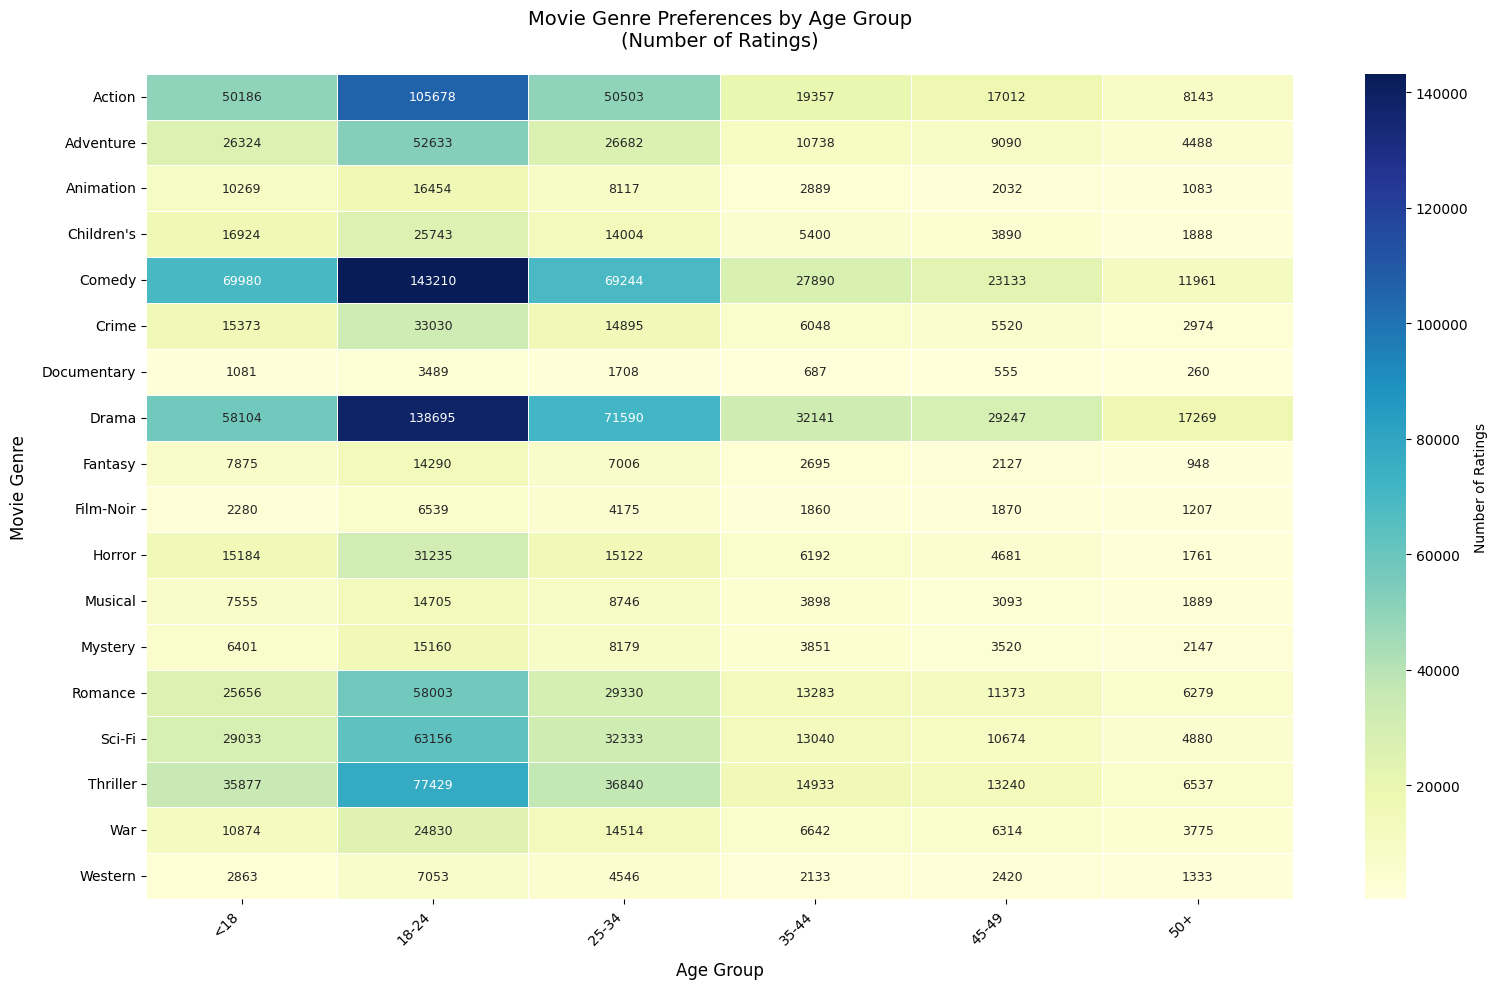

In [ ]:
genre_pref_age = genre_data.groupby(['Genres','AgeGroup'])['Rating'].count().unstack().fillna(0)

plt.figure(figsize=(16, 10))

ax = sns.heatmap(
    genre_pref_age,
    annot=True,
    fmt='.0f',
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='white',
    annot_kws={'size': 9},
    cbar_kws={'label': 'Number of Ratings'}
)


plt.title('Movie Genre Preferences by Age Group\n(Number of Ratings)', fontsize=14, pad=20)
plt.xlabel('Age Group', fontsize=12, labelpad=10)
plt.ylabel('Movie Genre', fontsize=12, labelpad=10)


ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


ax.grid(False)


plt.tight_layout()

plt.show()

C:\Users\Shawn\AppData\Local\Temp\ipykernel_8652\3992704194.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_rating_age = genre_data.groupby(['Genres','AgeGroup'])['Rating'].mean().unstack()


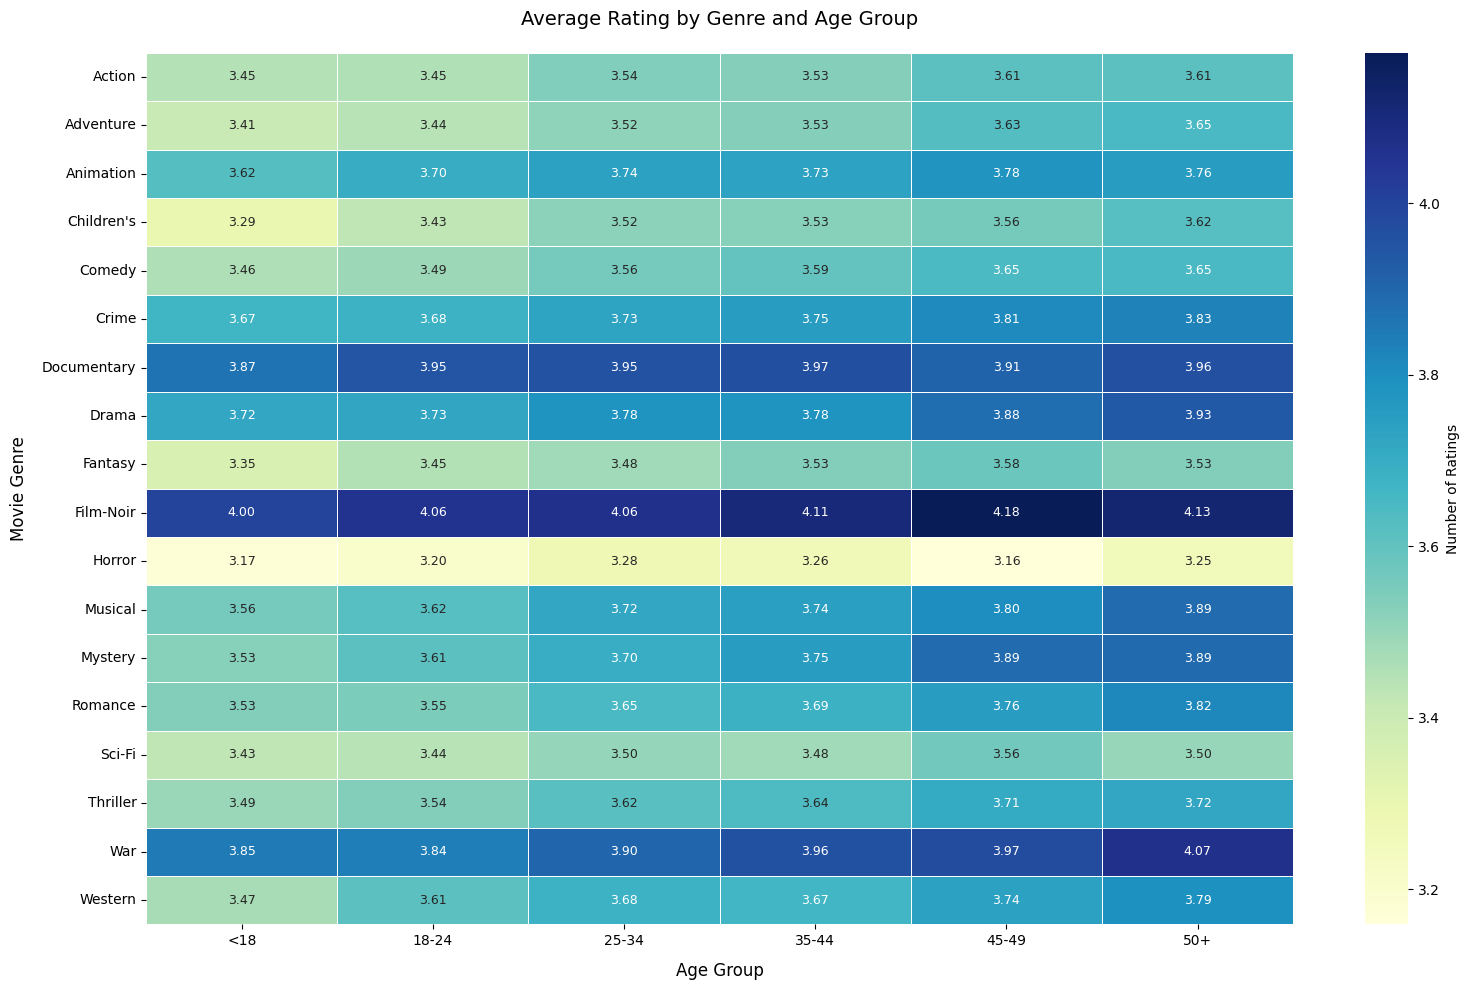

In [ ]:
genre_rating_age = genre_data.groupby(['Genres','AgeGroup'])['Rating'].mean().unstack()

plt.figure(figsize=(16, 10))

ax = sns.heatmap(
    genre_rating_age,
    annot=True,
    fmt='.2f',
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='white',
    annot_kws={'size': 9},
    cbar_kws={'label': 'Number of Ratings'}
)


plt.title('Average Rating by Genre and Age Group', fontsize=14, pad=20)
plt.xlabel('Age Group', fontsize=12, labelpad=10)
plt.ylabel('Movie Genre', fontsize=12, labelpad=10)


ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)


ax.grid(False)


plt.tight_layout()

plt.show()

C:\Users\Shawn\AppData\Local\Temp\ipykernel_8652\4175866613.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_rating_age = genre_data.groupby(['AgeGroup', 'Genres'])['Rating'].mean().reset_index()


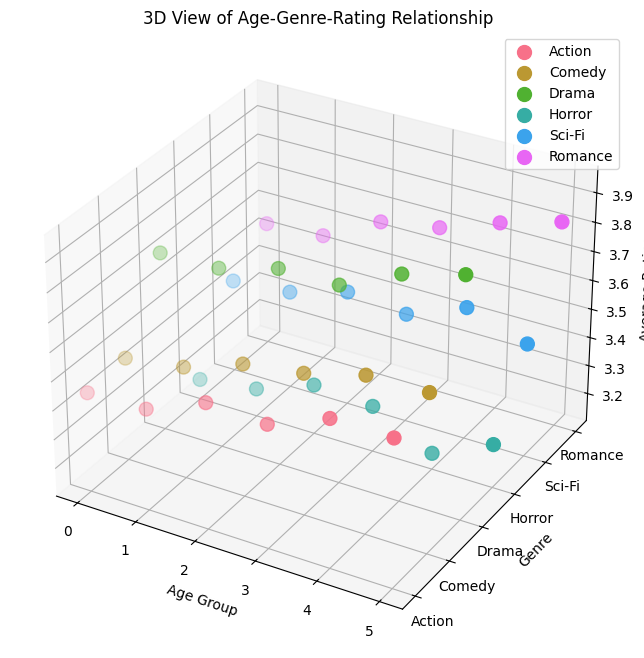

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


genre_rating_age = genre_data.groupby(['AgeGroup', 'Genres'])['Rating'].mean().reset_index()


selected_for_3d = ['Action', 'Comedy', 'Drama', 'Horror', 'Sci-Fi', 'Romance']
subset_3d = genre_rating_age[genre_rating_age['Genres'].isin(selected_for_3d)]


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

colors = sns.color_palette('husl', n_colors=len(selected_for_3d))
for i, genre in enumerate(selected_for_3d):
    genre_subset = subset_3d[subset_3d['Genres'] == genre]
    ax.scatter(genre_subset['AgeGroup'].cat.codes, 
               [i]*len(genre_subset), 
               genre_subset['Rating'],
               label=genre, 
               s=100, 
               c=[colors[i]])
    
ax.set_xlabel('Age Group')
ax.set_ylabel('Genre')
ax.set_zlabel('Average Rating')
ax.set_yticks(range(len(selected_for_3d)))
ax.set_yticklabels(selected_for_3d)
ax.set_title('3D View of Age-Genre-Rating Relationship')
plt.legend()
plt.show()

## Last.FM
https://grouplens.org/datasets/hetrec-2011/ 

### Load data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Path to data set
LastFM_path = "./hetrec2011-lastfm-2k"
artists = pd.read_csv(LastFM_path+'/artists.dat', sep='\t',encoding='latin-1')
tags = pd.read_csv(LastFM_path+'/tags.dat', sep='\t',encoding='latin-1')
user_artists = pd.read_csv(LastFM_path +'/user_artists.dat', sep='\t',encoding='latin-1')
user_taggedartists = pd.read_csv(LastFM_path+ '/user_taggedartists.dat', sep='\t',encoding='latin-1')
user_friends = pd.read_csv(LastFM_path +'/user_friends.dat', sep='\t',encoding='latin-1')

C:\Users\Shawn\AppData\Local\Temp\ipykernel_16844\1446498485.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(user_artists['weight'], bins=100, kde=False, log_scale=True,palette='rocket')


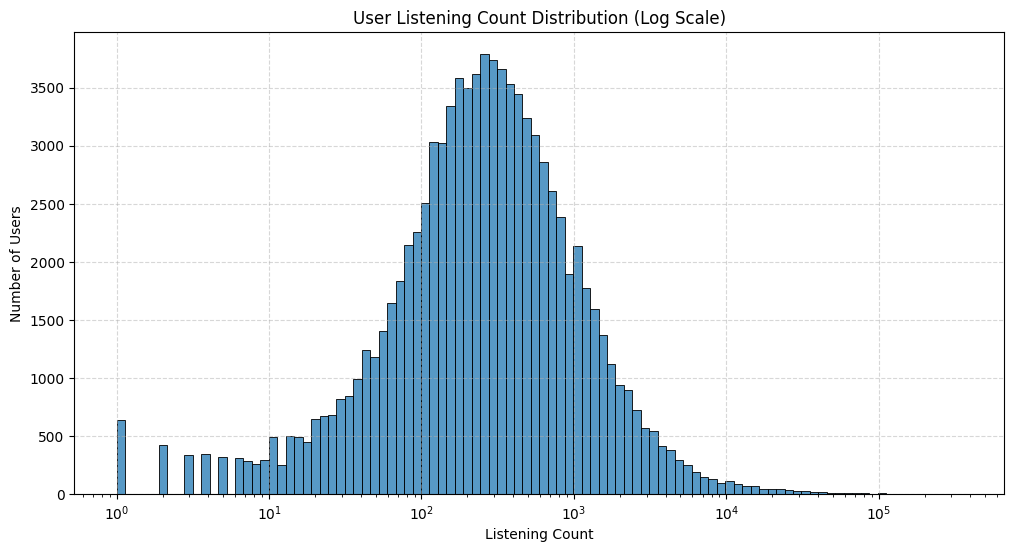

In [ ]:
# Listening count distribution
plt.figure(figsize=(12,6))
sns.histplot(user_artists['weight'], bins=100, kde=False, log_scale=True)
plt.title('User Listening Count Distribution (Log Scale)')
plt.xlabel('Listening Count')
plt.ylabel('Number of Users')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

C:\Users\Shawn\AppData\Local\Temp\ipykernel_16844\1583802874.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='name', data=top_20_artists, palette='viridis')


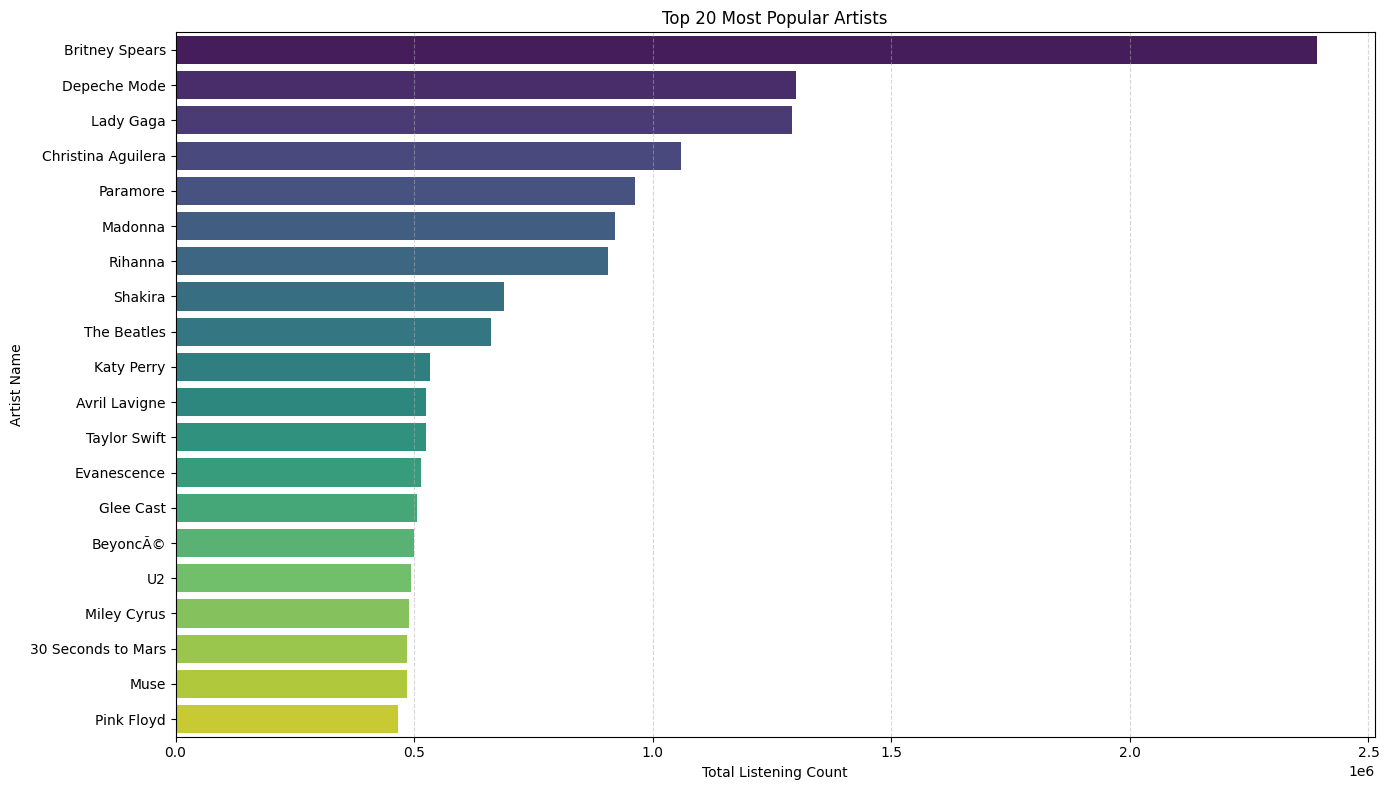

In [5]:
# Calculate artist popularity
artist_popularity = user_artists.groupby('artistID')['weight'].sum().sort_values(ascending=False)

# Top 20 artists
top_20_artists = artist_popularity.head(20).reset_index()
top_20_artists = pd.merge(top_20_artists, artists, left_on='artistID', right_on='id')

plt.figure(figsize=(14,8))
sns.barplot(x='weight', y='name', data=top_20_artists, palette='viridis')
plt.title('Top 20 Most Popular Artists')
plt.xlabel('Total Listening Count')
plt.ylabel('Artist Name')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\Shawn\AppData\Local\Temp\ipykernel_16844\966798836.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tags.values, y=top_tags.index, palette='viridis')


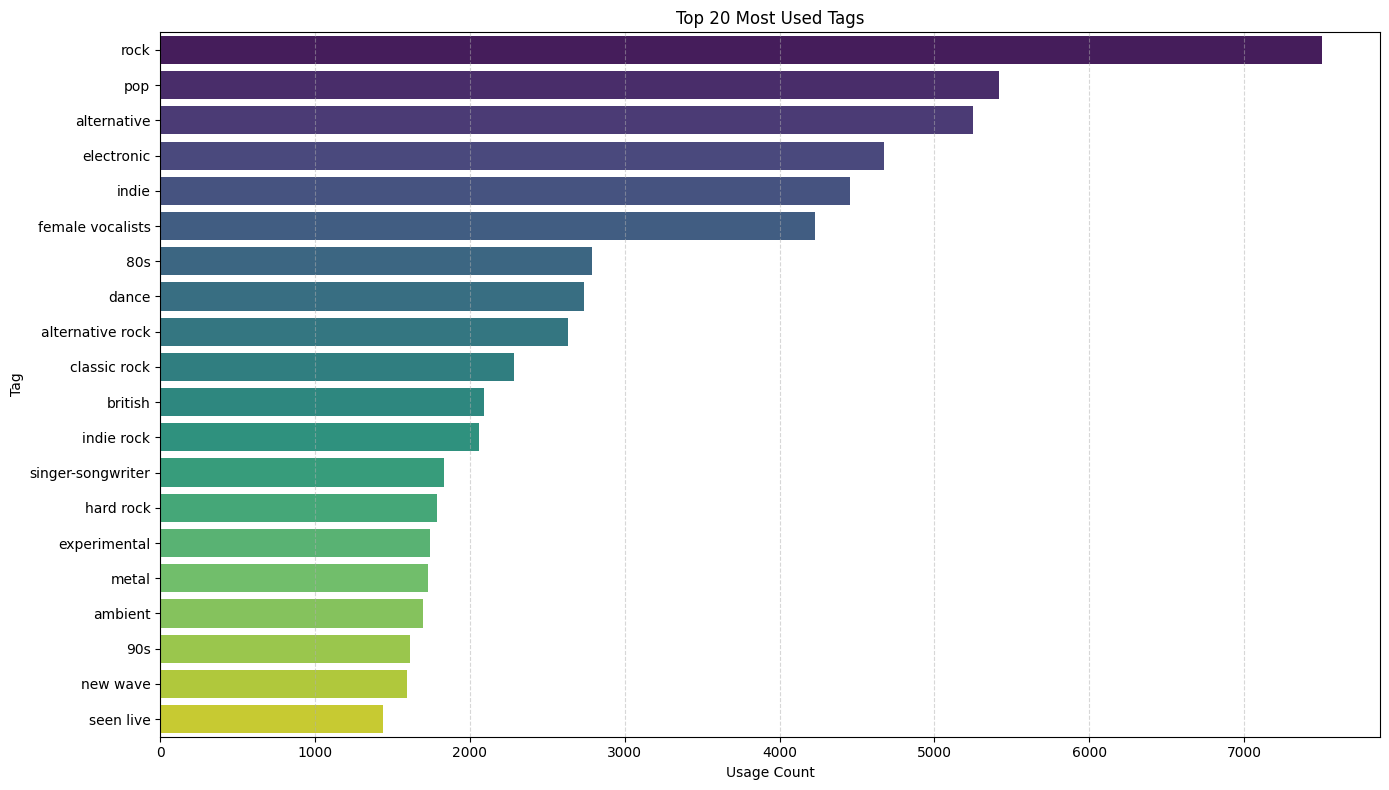

In [10]:
# Merge tag data
merged_tags = pd.merge(user_taggedartists, tags, on='tagID')

# Top 20 most used tags
top_tags = merged_tags['tagValue'].value_counts().head(20)

plt.figure(figsize=(14,8))
sns.barplot(x=top_tags.values, y=top_tags.index, palette='viridis')
plt.title('Top 20 Most Used Tags')
plt.xlabel('Usage Count')
plt.ylabel('Tag')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Yelp Academic Dataset
https://business.yelp.com/data/resources/open-dataset/ 